# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Loading datasets

In [25]:
data = pd.read_csv('netflix1.csv')

# Displaying the first few rows of the dataset

In [26]:
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


# Checking for missing values

In [27]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Droping duplicates if any

In [28]:
data.drop_duplicates(inplace=True)

# Droping rows with missing critical information

In [29]:
data.dropna(subset=['director','country'],inplace=True)

# Converting 'date_added' to datetime

In [30]:
data['date_added'] = pd.to_datetime(data['date_added'])

# Showing data types to confirm changes

In [31]:
data.dtypes

show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object

# Counting the number of Movies and TV Shows

In [33]:
type_counts = data['type'].value_counts()

# Ploting the distribution

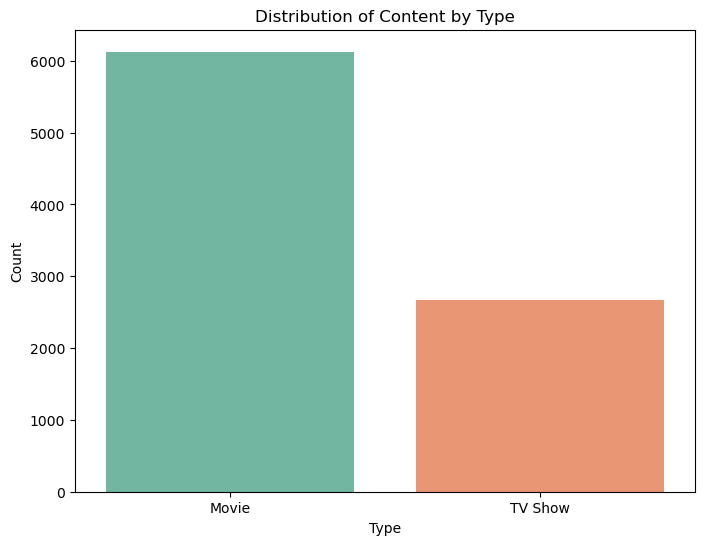

In [34]:
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index,y=type_counts.values,palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

# Splitting the 'listed_in' column and count genres

In [35]:
data['genres'] = data['listed_in'].apply(lambda x: x.split(','))
all_genres = sum(data['genres'], [])
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Plotting the most common genres

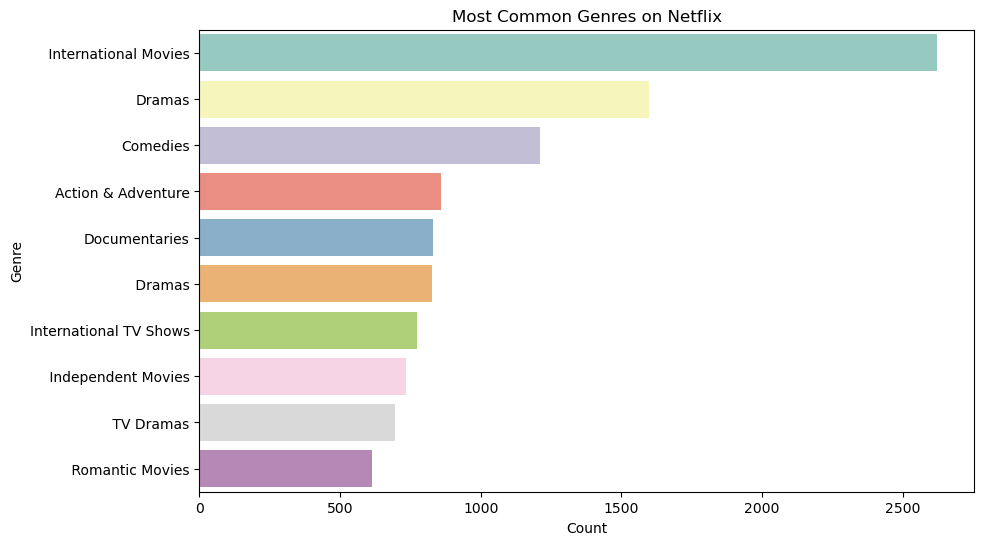

In [36]:
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values,y=genre_counts.index,palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

# Extracting year and month from 'date_added'

In [38]:
y=genre_counts.index,
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month

# Plotting content added over the years

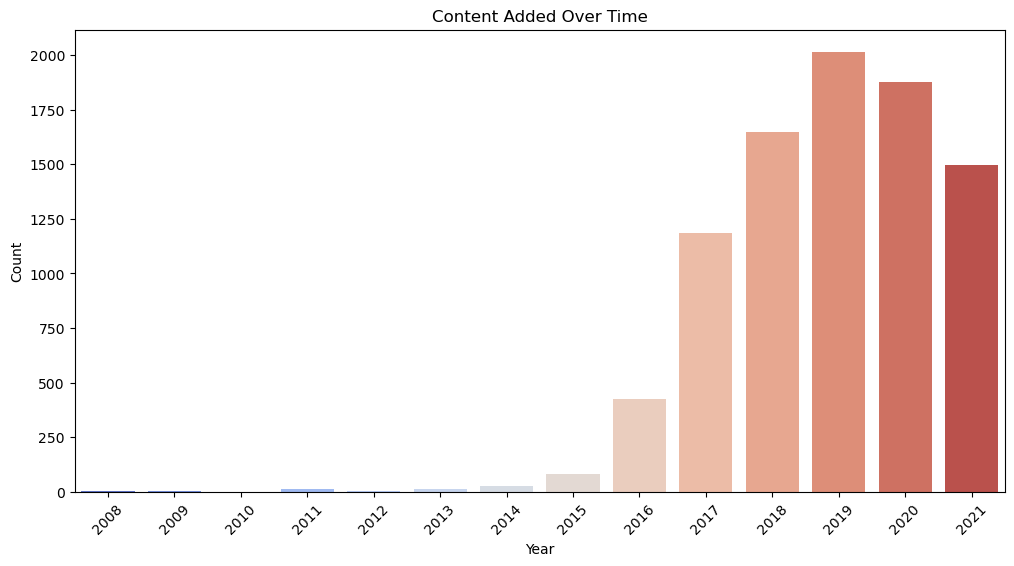

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=data, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Counting titles by director

In [ ]:
top_directors = data['director'].value_counts().head(10)

# Plotting top directors

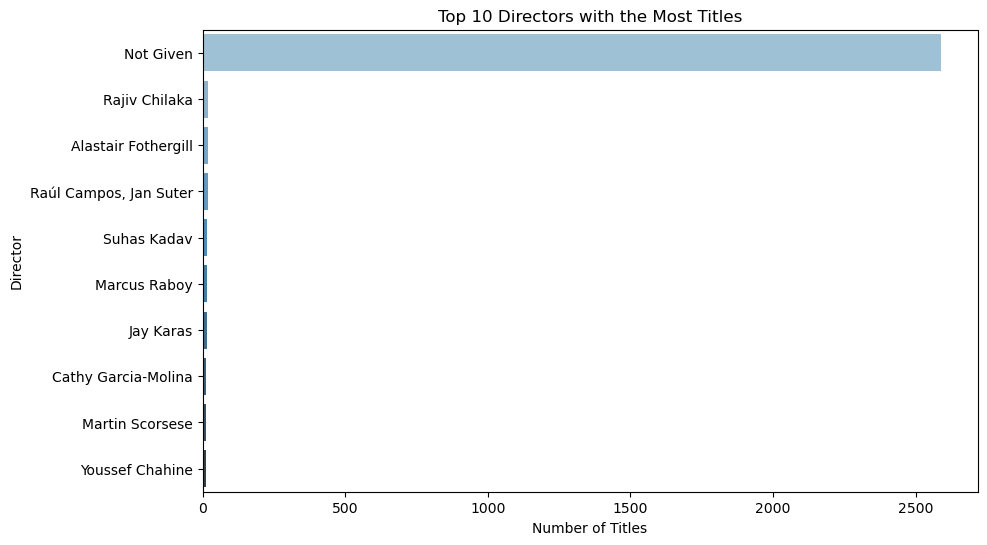

In [40]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values,y=top_directors.index,palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

# Generating word cloud

In [41]:
movie_titles = data[data['type'] == 'Movie']['title']
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plotting word cloud

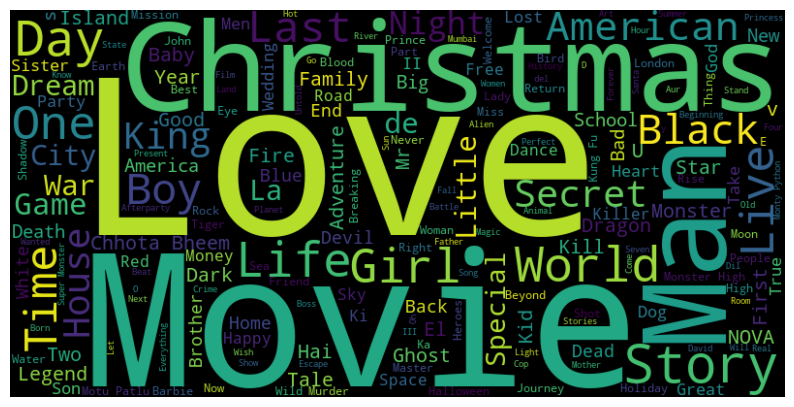

In [42]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()